## 8. putting it all together with a multi-class classification problem

* Binary classification = one thing or another (car vs. dog, spam vs. not spam, fraud or not fraud)

* Multi-class classification = more than one thing or another(cat vs. dog vs. chicken)

In [1]:
#brrow the def func 
# Calculate accuracy at the same time     [ Accuracy = (True Positive) / (True Positive + True Negative) * 100 ]
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

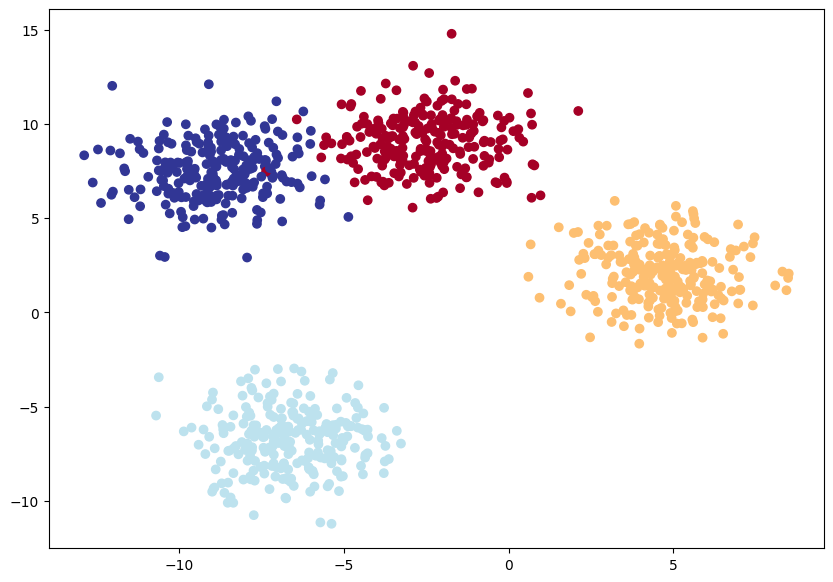

In [2]:
# Creat e a toy multi-class dataset 

# import dependencies
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. create multi-class data
X_blob, y_blob = make_blobs(n_samples = 1000, 
                            n_features = NUM_FEATURES, 
                            centers=NUM_CLASSES, 
                            cluster_std=1.5, #give the clusters a little shake up
                            random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, 
                                                                        y_blob, 
                                                                        test_size=0.2, 
                                                                        random_state=RANDOM_SEED)

# 4. Plot data (visualize)
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

In [3]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """ Initializes multi-class classification model.
        Args:
            input_features (int): Number of input features to the model
            output_features (int): Number of outputs features (number of output classes)
            hidden_units (int): Number of hidden units between layers, default 8
                
        Returns:
        
        Example: 
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features = input_features, out_features=hidden_units),
            nn.Linear(in_features = hidden_units, out_features=hidden_units),
            nn.Linear(in_features = hidden_units, out_features=output_features)
        )
    
    def forward(self, x):
        return self.linear_layer_stack(x)
    
model_mc = BlobModel(input_features = 2, output_features = 4, hidden_units = 8).to(device)

model_mc

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

#### - Create a loss function and an optimizer for a multi-class classification model

In [5]:
# create a loss function for multi-class classification
loss_fn = nn.CrossEntropyLoss()

# create an optimizer for multi-class classification 
optimizer = torch.optim.SGD(params= model_mc.parameters(), lr=0.1) # learning rate is a hyperparameter you can change


#### 8.4 Building train loop... [Getting prediction probabilities for a multi-classPyTorch Model]

In order to evaluate and train and test our model, we need to convert our model's outputs (logtis) to prediction labels

In [6]:
model_mc.eval()
with torch.inference_mode():
    y_logits = model_mc(X_blob_test.to(device))
    
y_logits[:10], y_blob_test[:10]
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.4882,  0.1078,  0.9124, -0.2504],
        [ 3.8264, -3.9794,  0.6500,  1.2002],
        [ 0.7149, -0.3697, -0.5813,  1.3230],
        [-0.7659,  0.5316,  0.5846, -0.0602],
        [ 1.9859, -2.4549,  1.2320,  0.1946]], device='cuda:0')
tensor([[1.2284e-01, 2.2294e-01, 4.9841e-01, 1.5581e-01],
        [8.9727e-01, 3.6551e-04, 3.7447e-02, 6.4916e-02],
        [2.8998e-01, 9.8025e-02, 7.9332e-02, 5.3267e-01],
        [9.4835e-02, 3.4710e-01, 3.6600e-01, 1.9207e-01],
        [6.0641e-01, 7.1474e-03, 2.8533e-01, 1.0111e-01]], device='cuda:0')


In [7]:
## convert our model's prediction prob to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds, y_blob_test

(tensor([2, 0, 3, 2, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3,
         3, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 3, 1, 0, 0, 3, 0, 0, 0, 3, 0, 0, 2, 2,
         0, 0, 1, 0, 2, 1, 0, 3, 2, 1, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 3, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 1, 0, 0, 0,
         1, 0, 0, 3, 0, 0, 0, 0, 3, 0, 1, 0, 0, 3, 1, 1, 0, 3, 3, 0, 0, 0, 1, 0,
         3, 0, 0, 2, 3, 0, 0, 0, 3, 0, 2, 3, 0, 3, 0, 0, 0, 0, 2, 2, 1, 0, 3, 0,
         3, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 3, 2, 3, 0, 0, 3, 0, 0, 3, 0,
         3, 3, 3, 0, 0, 2, 2, 2, 1, 1, 0, 1, 0, 3, 3, 2, 3, 3, 0, 2, 3, 3, 0, 0,
         1, 0, 3, 0, 0, 1, 3, 2], device='cuda:0'),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
         2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
         0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
         3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 

In [8]:
# Fit the muliti-class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#set number of epochs
epochs = 100  

# put data to the targget device 
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# loop through data 
for epoch in range(epochs):
    ### Training
    model_mc.train()
    
    y_logits = model_mc(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train, y_pred = y_pred)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    ### testing part
    model_mc.eval()
    with torch.inference_mode():
        test_logits = model_mc(X_blob_test)
        test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)
        
        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_preds)
        
    #print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test loss: {test_loss:.4f}, Test acc:{test_acc:.2f}%")

Epoch: 0 | Loss: 1.7201, Acc: 37.88% | Test loss: 1.4613, Test acc:73.00%
Epoch: 10 | Loss: 0.1266, Acc: 99.00% | Test loss: 0.1136, Test acc:99.00%
Epoch: 20 | Loss: 0.0743, Acc: 99.12% | Test loss: 0.0664, Test acc:99.50%
Epoch: 30 | Loss: 0.0561, Acc: 99.00% | Test loss: 0.0485, Test acc:99.50%
Epoch: 40 | Loss: 0.0471, Acc: 99.12% | Test loss: 0.0393, Test acc:99.50%
Epoch: 50 | Loss: 0.0418, Acc: 99.12% | Test loss: 0.0338, Test acc:99.50%
Epoch: 60 | Loss: 0.0383, Acc: 99.12% | Test loss: 0.0301, Test acc:99.50%
Epoch: 70 | Loss: 0.0359, Acc: 99.12% | Test loss: 0.0275, Test acc:99.50%
Epoch: 80 | Loss: 0.0341, Acc: 99.12% | Test loss: 0.0255, Test acc:99.50%
Epoch: 90 | Loss: 0.0327, Acc: 99.12% | Test loss: 0.0239, Test acc:99.50%


In [9]:
## visualize!!!!
model_mc.eval()
with torch.inference_mode():
    y_logits = model_mc(X_blob_test.to(device))
    
y_logits[:10], y_blob_test[:10]
y_pred_probs = torch.softmax(y_logits, dim=1)
y_preds=torch.argmax(y_pred_probs, dim=1)
y_preds[:10], y_blob_test[:10]

(tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0'),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0'))

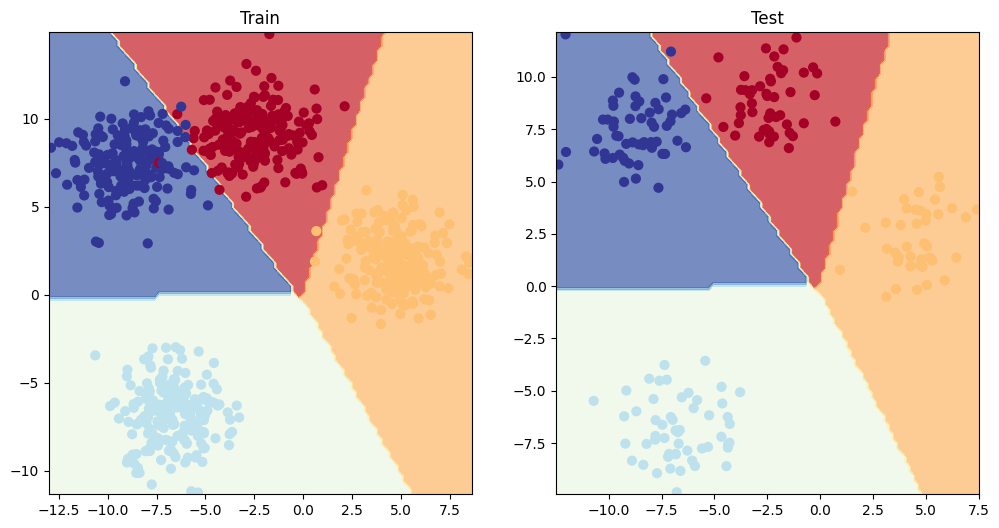

In [11]:
from helper_functions import plot_predictions, plot_decision_boundary

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_mc, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_mc, X_blob_test, y_blob_test)

## A few more classification metrics ...( to evaluate our classification model )

* Accuracy - out of 100 example, how many does our model get right?
* Precision
* Recall
* F1-score
* confusion matrix
* classification report